<img src="../DATA/corp_logo.jpg" width='160'>

# Custom Seeds with the WaterShed Algorithm

Previously setting markers takes a lot of works in the Watershed Algorithm. Now, let's try providing our own seeds!

---

### Reading Image

In [4]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

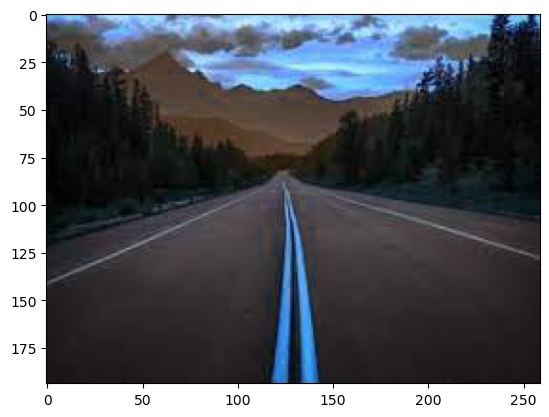

In [8]:
road = cv2.imread('../DATA/road_image.jpeg')
road_copy = np.copy(road)


plt.imshow(road)

#### Create an empty space for the results

In [10]:
road.shape

(194, 259, 3)

In [11]:
road.shape[:2]

(194, 259)

In [14]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)
segments = np.zeros(road.shape,dtype=np.uint8)
print ('segments shape: ', segments.shape,'\nmarker image shape: ', marker_image.shape)

segments shape:  (194, 259, 3) 
marker image shape:  (194, 259)


#### Create colors for Markers

https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [15]:
from matplotlib import cm

<br>

---

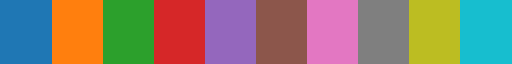

In [18]:
# Returns (R,G,B,Alpha). Only (R,G,B) is needed.
# Alpha component representing opacity (1.0 means fully opaque)
cm.tab10

In [30]:
print (cm.tab10(0))
print (cm.tab10(1))

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)


In [31]:
np.array(cm.tab10(0))

array([0.12156863, 0.46666667, 0.70588235, 1.        ])

In [33]:
# Grab RGB without Alpha
np.array(cm.tab10(0))[:3]

array([0.12156863, 0.46666667, 0.70588235])

In [36]:
# Scaling between 0 - 255
x = np.array(cm.tab10(0))[:3] * 255
x

array([ 31., 119., 180.])

In [37]:
x.astype(int)

array([ 31, 119, 180])

In [38]:
tuple(x.astype(int))

(31, 119, 180)

Next, A function for all of these steps will be created.

---
<br>

In [39]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [42]:
colors = []

# One color for each single digit
for i in range(10):
    colors.append(create_rgb(i))

colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

###  Set Up Callback Function

In [43]:
# Numbers 0-9
n_markers = 10

# Default settings
current_marker = 1
marks_updated = False